In [1]:
# Importing libraries which are to be used
import pandas as pd
import numpy as np

In [2]:
# Reading the file downloaded from https://www.gbif.org/occurrence/
main_df = pd.read_csv('lomdi.csv',sep='\t')

main_df.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,2864894747,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/59729119,Animalia,Chordata,Mammalia,Carnivora,Canidae,Canis,Canis latrans,...,lvonbampus,2020-09-15T22:49:39,CC_BY_NC_4_0,lvonbampus,lvonbampus,NaN,NaN,2020-09-27T12:57:13.021Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84
1,2864891151,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/59903690,Animalia,Chordata,Mammalia,Carnivora,Canidae,Canis,Canis latrans,...,J. Andrew Roberts,2020-09-17T19:50:15,CC_BY_NC_4_0,J. Andrew Roberts,J. Andrew Roberts,NaN,NaN,2020-09-27T13:11:26.259Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84
2,2864889015,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/59927319,Animalia,Chordata,Mammalia,Carnivora,Canidae,Canis,Canis latrans,...,cgraysontx,2020-09-18T01:28:54,CC_BY_NC_4_0,cgraysontx,cgraysontx,NaN,NaN,2020-09-27T13:10:11.394Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84
3,2864887921,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/59784432,Animalia,Chordata,Mammalia,Carnivora,Canidae,Canis,Canis latrans,...,Cord Eversole,2020-09-16T15:53:46,CC_BY_NC_4_0,Cord Eversole,Cord Eversole,NaN,NaN,2020-09-27T13:07:16.222Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84
4,2864881318,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/59651431,Animalia,Chordata,Mammalia,Carnivora,Canidae,Canis,Canis latrans,...,Nathanael Aff,2020-09-15T04:09:41,CC_BY_NC_4_0,Nathanael Aff,Nathanael Aff,NaN,NaN,2020-09-27T13:02:44.966Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84


In [3]:
# Just taking important columns and leaving else...
main_df = main_df[['species','decimalLatitude','decimalLongitude','day','month','year']]

main_df.head()

,species,decimalLatitude,decimalLongitude,day,month,year
0,Canis latrans,41.937095,-88.295792,15.0,9.0,2020
1,Canis latrans,40.066944,-82.455556,29.0,8.0,2020
2,Canis latrans,45.044466,-110.702518,17.0,9.0,2020
3,Canis latrans,28.104432,-97.403496,12.0,9.0,2020
4,Canis latrans,37.768413,-122.487641,14.0,9.0,2020


In [4]:
# Checking that are there null elements in the data.
main_df.isnull().sum()

species               0
decimalLatitude     182
decimalLongitude    182
day                 106
month                88
year                  0
dtype: int64

In [5]:
# Dropping all null element containing rows
main_df = main_df.dropna()

# Reseting index
main_df = main_df.reset_index(drop=True)

main_df.isnull().sum()

species             0
decimalLatitude     0
decimalLongitude    0
day                 0
month               0
year                0
dtype: int64

In [6]:
# Converting day, month, year to string...
main_df['day'] = main_df['day'].astype(int).astype(str)
main_df['month'] = main_df['month'].astype(int).astype(str)
main_df['year'] = main_df['year'].astype(int).astype(str)

main_df.head()

,species,decimalLatitude,decimalLongitude,day,month,year
0,Canis latrans,41.937095,-88.295792,15,9,2020
1,Canis latrans,40.066944,-82.455556,29,8,2020
2,Canis latrans,45.044466,-110.702518,17,9,2020
3,Canis latrans,28.104432,-97.403496,12,9,2020
4,Canis latrans,37.768413,-122.487641,14,9,2020


In [7]:
# Reading air temprature data downloaded from https://datasearch.globe.gov/ 
temp_df = pd.read_csv('air_temp.csv')

# Dropping empty cells
temp_df = temp_df.dropna()

# Setting date into the required format
temp_df['measured_on'] = temp_df['measured_on'].astype(str)
temp_df['measured_on'] = temp_df['measured_on'].apply(lambda x: str(int(x[3:5]))+'-'+str(x[6:]))

# Setting measured on as index. 
temp_df = temp_df.set_index('measured_on')

temp_df.head()

,latitude,longitude,maximum temp (deg C),minimum temp (deg C),average temp (deg C)
measured_on,,,,,
1-2003,32.1696,-110.4378,32.1,-0.7,15.5
2-2003,32.1696,-110.4378,32.4,-2.4,13.7
3-2003,32.1696,-110.4378,33.3,1.9,16.2
5-2003,32.1696,-110.4378,43.8,5.5,26.3
6-2003,32.1696,-110.4378,45.4,14.5,30.3


In [8]:
# Reading soil temprature data downloaded from https://datasearch.globe.gov/ 
soil_temp_df = pd.read_csv('soil_temp.csv')

# Dropping empty cells
soil_temp_df = soil_temp_df.dropna()

# Setting date into the required format
soil_temp_df['measured_on'] = soil_temp_df['measured_on'].astype(str)
soil_temp_df['measured_on'] = soil_temp_df['measured_on'].apply(lambda x: str(int(x[3:5]))+'-'+str(x[6:]))

# Setting measured on as index. 
soil_temp_df = soil_temp_df.set_index('measured_on')

soil_temp_df.head()

,latitude,longitude,depth level (cm),maximum temp (deg C),minimum temp (deg C),average temp (deg C)
measured_on,,,,,,
1-2003,32.1696,-110.4378,10,20.9,5.4,13.9
2-2003,32.1696,-110.4378,10,22.1,7.7,14.0
3-2003,32.1696,-110.4378,10,27.0,8.0,17.3
5-2003,32.1696,-110.4378,10,40.2,21.6,30.7
6-2003,32.1696,-110.4378,10,42.1,29.4,35.5


In [9]:
# Reading precipitation data downloaded from https://datasearch.globe.gov/ 
rain_df = pd.read_csv('precipitation.csv')

# Dropping empty cells
rain_df = rain_df.dropna()

# Setting date into the required format
rain_df['measured_on'] = rain_df['measured_on'].astype(str)
rain_df['measured_on'] = rain_df['measured_on'].apply(lambda x: str(int(x[3:5]))+'-'+str(x[6:]))

# Setting measured on as index.
rain_df = rain_df.set_index('measured_on')

rain_df.head()

,latitude,longitude,number of days reported,precipitation monthlies
measured_on,,,,
2-2004,32.169600,-110.437800,29,18.3
2-2005,32.169600,-110.437800,28,17.0
12-2017,36.290455,-93.296115,31,51.1
10-2018,36.290455,-93.296115,31,98.5
11-2018,36.290455,-93.296115,30,78.8


In [10]:
# Reading precipitation data downloaded from https://datasearch.globe.gov/ 
aerosol_df = pd.read_csv('aerosol.csv')

# Dropping empty cells
aerosol_df = aerosol_df.dropna()

# Setting date into the required format
aerosol_df['measured_on'] = aerosol_df['measured_on'].astype(str)
aerosol_df['measured_on'] = aerosol_df['measured_on'].apply(lambda x: str(int(x[3:5]))+'-'+str(x[6:]))

# Removing duplicate entries...
aerosol_df = aerosol_df.drop_duplicates(subset=['measured_on','latitude', 'longitude'])

# Setting measured on as index.
aerosol_df = aerosol_df.set_index('measured_on')
aerosol_df.head()

,latitude,longitude,optical thickness,transmission percent
measured_on,,,,
7-2020,36.290455,-93.296115,0.098131,90.653044
7-2020,45.816720,-118.490850,0.077270,92.563947
7-2020,36.323437,-93.258022,0.122710,88.452013
6-2020,36.323437,-93.258022,0.266350,76.617064
6-2020,36.290455,-93.296115,0.212363,80.867107


In [11]:
from math import cos, asin, sqrt

# Calculating distance between two points with latitude and longitude...   
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

# Calculating minimum distant point from data
def closest(data, v):
    return min(data, key=lambda p: distance(v['decimalLatitude'],v['decimalLongitude'],p['latitude'],p['longitude']))

In [12]:
# Getting data of all the parameters of each occurence of species...

for i in range (main_df.shape[0]):
    time = main_df.iloc[i][4] + '-' + main_df.iloc[i][5]
    v = main_df.iloc[i][['decimalLatitude','decimalLongitude']].to_dict()
    
    try:
        time_rain = rain_df.loc[time]
        rain_arr = time_rain[['latitude','longitude']].to_dict('records')
        closest_rain_point = closest(rain_arr, v)
        rain = time_rain[time_rain['latitude']==closest_rain_point['latitude']]['precipitation monthlies'][0]
        main_df.at[i, 'rain'] = rain
    except:
        pass
    
    try:
        time_temp = temp_df.loc[time]
        temp_arr = time_temp[['latitude','longitude']].to_dict('records')
        closest_temp_point = closest(temp_arr, v)
        temp = time_temp[time_temp['latitude']==closest_temp_point['latitude']]['average temp (deg C)'][0]
        main_df.at[i, 'temp'] = temp
    except:
        pass
    
    try:
        time_soil_temp = soil_temp_df.loc[time]
        soil_temp_arr = time_soil_temp[['latitude','longitude']].to_dict('records')
        closest_soil_temp_point = closest(soil_temp_arr, v)
        soil_temp = time_soil_temp[time_soil_temp['latitude']==closest_soil_temp_point['latitude']]['average temp (deg C)'][0]
        main_df.at[i, 'soil_temp'] = soil_temp
    except:
        pass
    
    try:
        time_aerosol = aerosol_df.loc[time]
        aerosol_arr = time_aerosol[['latitude','longitude']].to_dict('records')
        closest_aerosol_point = closest(aerosol_arr, v)
        optical_thickness = time_aerosol[time_aerosol['latitude']==closest_aerosol_point['latitude']]['optical thickness'][0]
        transmission_percent = time_aerosol[time_aerosol['latitude']==closest_aerosol_point['latitude']]['transmission percent'][0]
        main_df.at[i, 'optical_thickness'] = optical_thickness
        main_df.at[i, 'transmission_percent'] = transmission_percent
    except:
        pass
    
main_df.head()

,species,decimalLatitude,decimalLongitude,day,month,year,rain,temp,soil_temp,optical_thickness,transmission_percent
0,Canis latrans,41.937095,-88.295792,15,9,2020,NaN,NaN,NaN,NaN,NaN
1,Canis latrans,40.066944,-82.455556,29,8,2020,50.6,22.2,25.0,NaN,NaN
2,Canis latrans,45.044466,-110.702518,17,9,2020,NaN,NaN,NaN,NaN,NaN
3,Canis latrans,28.104432,-97.403496,12,9,2020,NaN,NaN,NaN,NaN,NaN
4,Canis latrans,37.768413,-122.487641,14,9,2020,NaN,NaN,NaN,NaN,NaN


In [13]:
# Checking nan again as there may be some points with no data of that year so those particular entries will be nan.
main_df.isnull().sum()

species                    0
decimalLatitude            0
decimalLongitude           0
day                        0
month                      0
year                       0
rain                     688
temp                     124
soil_temp               1186
optical_thickness       1690
transmission_percent    1690
dtype: int64

In [14]:
# Dropping nan containg rows...
main_df = main_df.dropna()

main_df.isnull().sum()

species                 0
decimalLatitude         0
decimalLongitude        0
day                     0
month                   0
year                    0
rain                    0
temp                    0
soil_temp               0
optical_thickness       0
transmission_percent    0
dtype: int64

In [15]:
# Calculating mean and stdv for each parameter...
temp_mean = np.mean(main_df['temp'])
temp_stdv = np.std(main_df['temp'])

soil_temp_mean = np.mean(main_df['soil_temp'])
soil_temp_stdv = np.std(main_df['soil_temp'])

rain_mean = np.mean(main_df['rain'])
rain_stdv = np.std(main_df['rain'])

optical_thickness_mean = np.mean(main_df['optical_thickness'])
optical_thickness_stdv = np.std(main_df['optical_thickness'])

transmission_percent_mean = np.mean(main_df['transmission_percent'])
transmission_percent_stdv = np.std(main_df['transmission_percent'])

In [16]:
# Calculating range in which 70 percent of species will occur according to Haversine Formula
temp_range = [temp_mean - 1.5 * temp_stdv, temp_mean + 1.5 * temp_stdv]
soil_temp_range = [soil_temp_mean - 1.5 * soil_temp_stdv, soil_temp_mean + 1.5 * soil_temp_stdv]
rain_range = [rain_mean - 1.5 * rain_stdv, rain_mean + 1.5 * rain_stdv]
optical_thickness_range = [optical_thickness_mean - 1.5 * optical_thickness_stdv, optical_thickness_mean + 1.5 * optical_thickness_stdv]
transmission_percent_range = [transmission_percent_mean - 1.5 * transmission_percent_stdv, transmission_percent_mean + 1.5 * transmission_percent_stdv]

print('Temprature range --- from ' + str(temp_range[0]) + ' to ' + str(temp_range[1]))
print('Soil Temprature range --- from ' + str(soil_temp_range[0]) + ' to ' + str(soil_temp_range[1]))
print('Rain range --- from ' + str(rain_range[0]) + ' to ' + str(rain_range[1]))
print('Optical Thickness range --- from ' + str(optical_thickness_range[0]) + ' to ' + str(optical_thickness_range[1]))
print('Transmission Percent range --- from ' + str(transmission_percent_range[0]) + ' to ' + str(transmission_percent_range[1]))

Temprature range --- from 1.6359562008893995 to 26.51216800157757
Soil Temprature range --- from 0.34553194878515825 to 24.87347273007554
Rain range --- from -7888.846675553753 to 8545.499946502277
Optical Thickness range --- from -0.7565023477843804 to 1.1533679255012588
Transmission Percent range --- from 60.35501650957347 to 109.39075179072191


In [17]:
# Plotting all the points on google map
import gmplot 

latitude_list = np.array(main_df['decimalLatitude'])
  
longitude_list = np.array(main_df['decimalLongitude'])
gmap4 = gmplot.GoogleMapPlotter(30.3164945, 
                                78.03219179999999, 13) 
 
gmap4.scatter( latitude_list, longitude_list, '#FF0000', size = 40, marker = False )
gmap4.draw( "C:\\Users\\cmgupta159\\Desktop\\lomdi.html")

In [18]:
# Importing libraries to plot graphs
import matplotlib.pyplot as plt
import seaborn as sns 

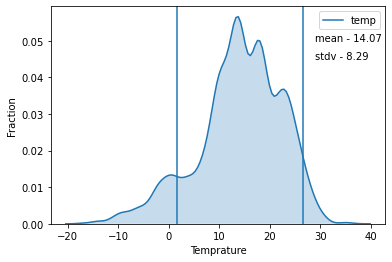

In [19]:
# Plotting fraction of Temprature
graph1 = sns.kdeplot(data=main_df['temp'], shade=True)
graph1.axvline(temp_range[0])
graph1.axvline(temp_range[1])
graph1.set_xlabel("Temprature")
graph1.set_ylabel("Fraction")
plt.text(29,.05,'mean - ' + str(round(temp_mean,2)))
plt.text(29,.045,'stdv - ' + str(round(temp_stdv,2)))
plt.savefig('kde_temp_lomdi.png')
plt.show()

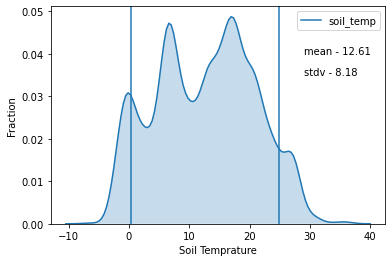

In [20]:
# Plotting fraction of Soil Temprature
graph2 = sns.kdeplot(data=main_df['soil_temp'], shade=True)
graph2.axvline(soil_temp_range[0])
graph2.axvline(soil_temp_range[1])
plt.xlabel("Soil Temprature")
plt.ylabel("Fraction")
plt.text(29,.04,'mean - ' + str(round(soil_temp_mean,2)))
plt.text(29,.035,'stdv - ' + str(round(soil_temp_stdv,2)))
plt.savefig('soil_temp_lomdi.png')
plt.show()

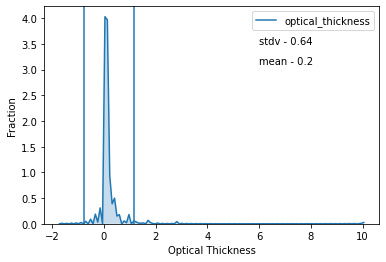

In [21]:
# Plotting fraction of Optical Thickness
graph = sns.kdeplot(data=main_df['optical_thickness'], shade=True)
graph.axvline(optical_thickness_range[0])
graph.axvline(optical_thickness_range[1])
plt.xlabel("Optical Thickness")
plt.ylabel("Fraction")
plt.text(6,3.1,'mean - ' + str(round(optical_thickness_mean,2)))
plt.text(6,3.5,'stdv - ' + str(round(optical_thickness_stdv,2)))
plt.savefig('optical_lomdi.png')
plt.show()

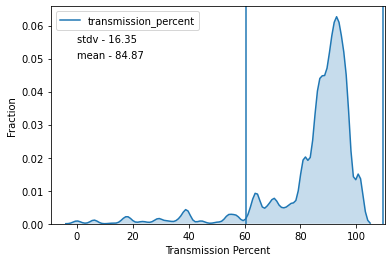

In [22]:
# Plotting fraction of Transmission Percent
graph = sns.kdeplot(data=main_df['transmission_percent'], shade=True)
graph.axvline(transmission_percent_range[0])
graph.axvline(transmission_percent_range[1])
plt.xlabel("Transmission Percent")
plt.ylabel("Fraction")
plt.text(0,.05,'mean - ' + str(round(transmission_percent_mean,2)))
plt.text(0,.055,'stdv - ' + str(round(transmission_percent_stdv,2)))
plt.savefig('trans_lomdi.png')
plt.show()

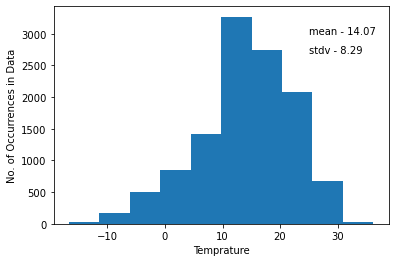

In [23]:
plt.hist(main_df['temp'])
plt.xlabel("Temprature")
plt.ylabel("No. of Occurrences in Data")
plt.text(25,3000,'mean - ' + str(round(temp_mean,2)))
plt.text(25,2700,'stdv - ' + str(round(temp_stdv,2)))
plt.savefig('hist_temp_lomdi.png')